<a href="https://colab.research.google.com/github/YuriSerhiienko/data_science_hw2/blob/main/Hw2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
import pandas as pd
data = pd.read_csv('2017_jun_final.csv')

In [26]:
#Прочитайте отриману таблицю, використовуючи метод head
print(data.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

In [27]:
#Визначте розмір таблиці за допомогою методу shape
print(data.shape)

(8704, 25)


In [28]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
print(data.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [29]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_values_proportion = data.isnull().sum() / len(data)
print(missing_values_proportion)


N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Специализация                       0.829389
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Университет                         0.041131
Еще.студент                         0.000000
Уровень.английского                 0.000000
Предметная.область                  0.025620
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

In [30]:
#Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
data = data.drop(columns=data.columns[(data.isnull().sum() > 0) & (data.columns != 'Язык.программирования')])


In [31]:
#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
print(data.isnull().sum() / len(data))

N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Еще.студент                         0.000000
Уровень.английского                 0.000000
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64


In [32]:
#Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
data = data.dropna()

In [33]:
#Визначте новий розмір таблиці за допомогою методу shape
print(data.shape)


(4854, 20)


In [34]:
#Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data = data[data['Язык.программирования'].str.contains('Python', na=False)]


In [35]:
#Визначте розмір таблиці python_data за допомогою методу shape
print(python_data.shape)


(207, 20)


In [36]:
#Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
#Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
position_salary_stats = data.groupby('Должность')['Зарплата.в.месяц'].agg(['min', 'max'])


In [37]:
#Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
def fill_avg_salary(row, stats):
    return (stats.loc[row['Должность'], 'min'] + stats.loc[row['Должность'], 'max']) / 2

data['avg'] = data.apply(fill_avg_salary, stats=position_salary_stats, axis=1)

In [38]:
#Створіть описову статистику за допомогою методу describe для нового стовпчика.
print(data['avg'].describe())

count    4854.000000
mean     3551.619798
std      1829.772793
min       492.500000
25%      1337.500000
50%      3550.000000
75%      4775.000000
max      9250.000000
Name: avg, dtype: float64


In [39]:
#Збережіть отриману таблицю в CSV файл
data.to_csv('оновлені_дані.csv', index=False)

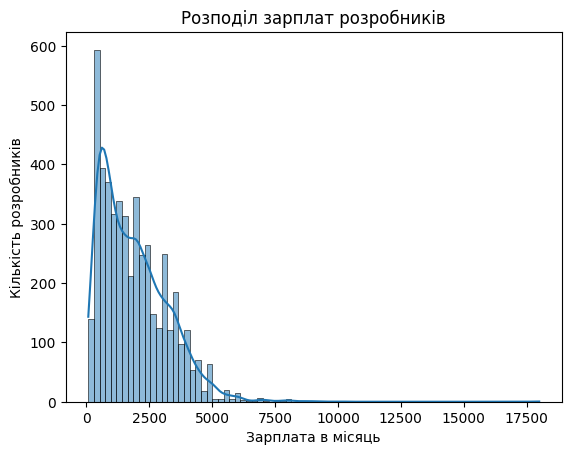

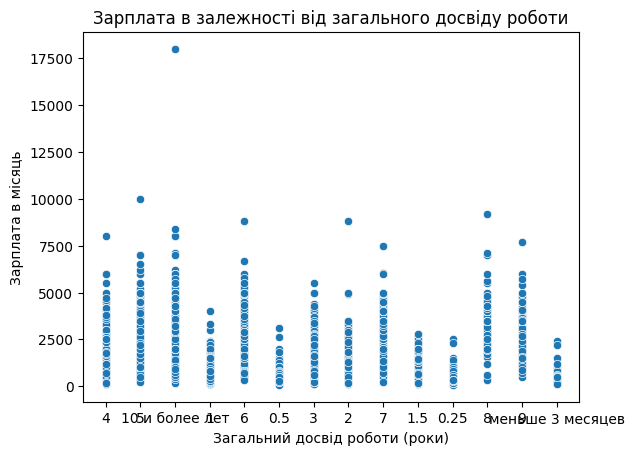

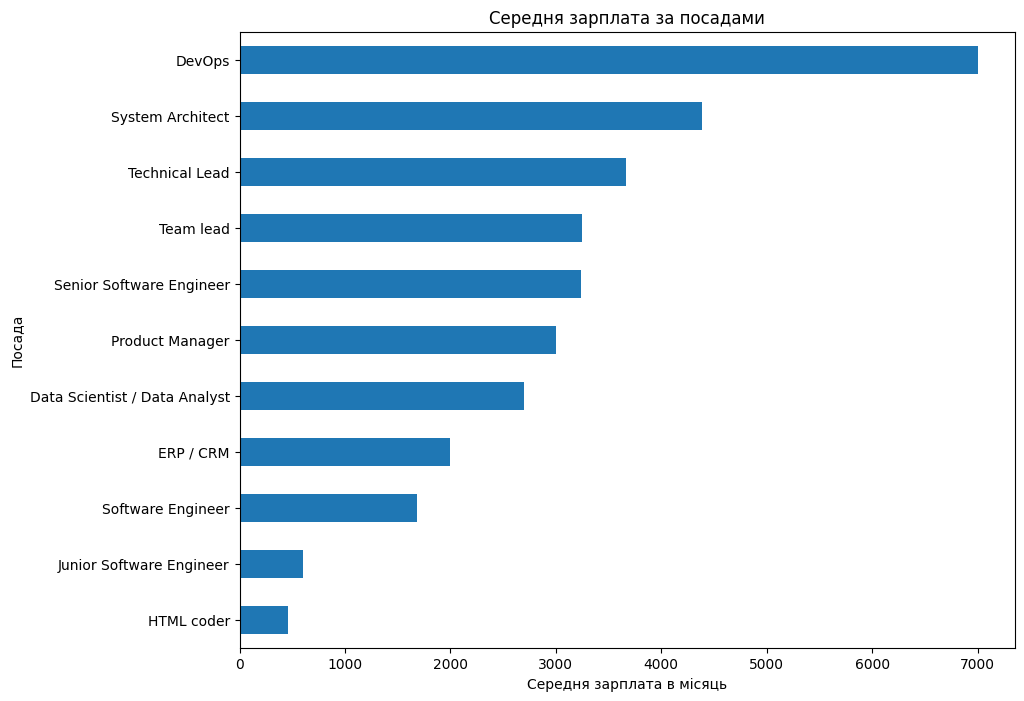

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Графік 1: Гістограма розподілу зарплат
sns.histplot(data['Зарплата.в.месяц'], kde=True)
plt.title('Розподіл зарплат розробників')
plt.xlabel('Зарплата в місяць')
plt.ylabel('Кількість розробників')
plt.show()

# Графік 2: Скатерплот зарплати в залежності від досвіду роботи
sns.scatterplot(x='Общий.опыт.работы', y='Зарплата.в.месяц', data=data)
plt.title('Зарплата в залежності від загального досвіду роботи')
plt.xlabel('Загальний досвід роботи (роки)')
plt.ylabel('Зарплата в місяць')
plt.show()

# Графік 3: Стовпчикова діаграма середньої зарплати за посадами
avg_salary_by_position = data.groupby('Должность')['Зарплата.в.месяц'].mean().sort_values()
avg_salary_by_position.plot(kind='barh', figsize=(10, 8))
plt.title('Середня зарплата за посадами')
plt.xlabel('Середня зарплата в місяць')
plt.ylabel('Посада')
plt.show()
